<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ShortHumor" data-toc-modified-id="ShortHumor-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ShortHumor</a></span><ul class="toc-item"><li><span><a href="#unfreeze,-with-pooler,-limit-30000" data-toc-modified-id="unfreeze,-with-pooler,-limit-30000-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>unfreeze, with pooler, limit 30000</a></span></li><li><span><a href="#unfreeze,-without-pooler,-limit-30000" data-toc-modified-id="unfreeze,-without-pooler,-limit-30000-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>unfreeze, without pooler, limit 30000</a></span></li><li><span><a href="#freeze-6,-without-pooler,-limit-30000" data-toc-modified-id="freeze-6,-without-pooler,-limit-30000-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>freeze 6, without pooler, limit 30000</a></span></li><li><span><a href="#freeze-all,-without-pooler,-limit-30000" data-toc-modified-id="freeze-all,-without-pooler,-limit-30000-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>freeze all, without pooler, limit 30000</a></span></li></ul></li><li><span><a href="#SARC" data-toc-modified-id="SARC-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SARC</a></span><ul class="toc-item"><li><span><a href="#unfreeze,-with-pooler,-limit-30000" data-toc-modified-id="unfreeze,-with-pooler,-limit-30000-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>unfreeze, with pooler, limit 30000</a></span></li><li><span><a href="#unfreeze,-without-pooler,-limit-30000" data-toc-modified-id="unfreeze,-without-pooler,-limit-30000-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>unfreeze, without pooler, limit 30000</a></span></li></ul></li></ul></div>

In [ ]:
%run ./multitask_style_learning_utils.ipynb

# ShortHumor

## unfreeze, with pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/4690 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_ShortHumor,train_acc,train_acc_ShortHumor,val_loss,val_loss_ShortHumor,val_acc,val_acc_ShortHumor
0,0.0,0.064704,0.064704,0.983533,0.983533,0.143069,0.143069,0.951589,0.951589
1,1.0,0.008979,0.008979,0.997867,0.997867,0.130444,0.130444,0.960161,0.960161
2,2.0,0.003303,0.003303,0.999133,0.999133,0.175154,0.175154,0.958144,0.958144
3,3.0,0.000823,0.000823,0.999800,0.999800,0.173058,0.173058,0.960666,0.960666
4,4.0,0.000402,0.000402,0.999900,0.999900,0.209030,0.209030,0.958649,0.958649


Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

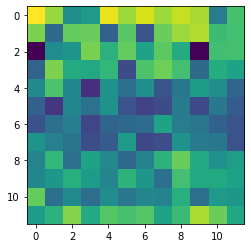

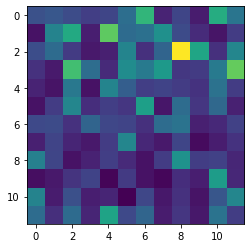

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
#                   'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=True,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


## unfreeze, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/4690 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_ShortHumor,train_acc,train_acc_ShortHumor,val_loss,val_loss_ShortHumor,val_acc,val_acc_ShortHumor
0,0.0,0.051568,0.051568,0.987833,0.987833,0.134883,0.134883,0.950076,0.950076
1,1.0,0.006494,0.006494,0.997933,0.997933,0.150258,0.150258,0.956127,0.956127
2,2.0,0.001580,0.001580,0.999567,0.999567,0.180887,0.180887,0.961674,0.961674
3,3.0,0.000994,0.000994,0.999767,0.999767,0.200599,0.200599,0.956127,0.956127
4,4.0,0.000277,0.000277,0.999900,0.999900,0.193206,0.193206,0.961674,0.961674


Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

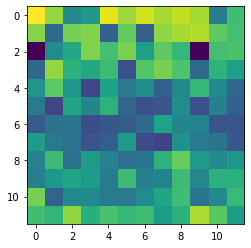

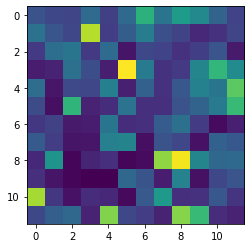

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
#                   'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


## freeze 6, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/4690 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_ShortHumor,train_acc,train_acc_ShortHumor,val_loss,val_loss_ShortHumor,val_acc,val_acc_ShortHumor
0,0.0,0.065931,0.065931,0.983900,0.983900,0.137278,0.137278,0.950580,0.950580
1,1.0,0.012951,0.012951,0.996367,0.996367,0.133627,0.133627,0.956631,0.956631
2,2.0,0.004083,0.004083,0.998633,0.998633,0.161241,0.161241,0.957136,0.957136
3,3.0,0.001158,0.001158,0.999700,0.999700,0.171475,0.171475,0.962683,0.962683
4,4.0,0.000296,0.000296,0.999967,0.999967,0.173327,0.173327,0.968734,0.968734


Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

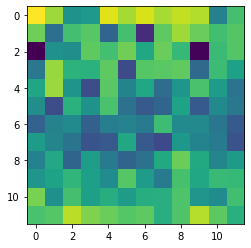

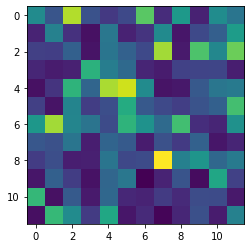

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
#                   'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=6,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


## freeze all, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/4690 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/62 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_ShortHumor,train_acc,train_acc_ShortHumor,val_loss,val_loss_ShortHumor,val_acc,val_acc_ShortHumor
0,0.0,0.514510,0.514510,0.782100,0.782100,0.514532,0.514532,0.777105,0.777105
1,1.0,0.456333,0.456333,0.812633,0.812633,0.457505,0.457505,0.815935,0.815935
2,2.0,0.430362,0.430362,0.824900,0.824900,0.432677,0.432677,0.829047,0.829047
3,3.0,0.417233,0.417233,0.830733,0.830733,0.420255,0.420255,0.834090,0.834090
4,4.0,0.413320,0.413320,0.832367,0.832367,0.416594,0.416594,0.836107,0.836107


Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

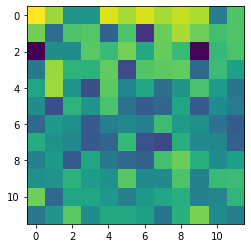

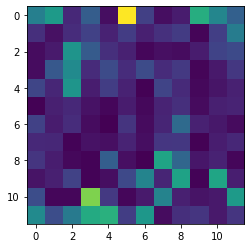

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
#                   'SARC', # 205645
#                   'SarcasmGhosh', # 39780
                  'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=True,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


# SARC

## unfreeze, with pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/4690 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_SARC,train_acc,train_acc_SARC,val_loss,val_loss_SARC,val_acc,val_acc_SARC
0,0.0,0.492000,0.492000,0.768267,0.768267,0.594769,0.594769,0.689100,0.689100
1,1.0,0.269824,0.269824,0.897033,0.897033,0.831604,0.831604,0.683833,0.683833
2,2.0,0.122094,0.122094,0.958733,0.958733,0.984638,0.984638,0.684700,0.684700
3,3.0,0.061425,0.061425,0.980633,0.980633,1.075409,1.075409,0.676633,0.676633
4,4.0,0.027939,0.027939,0.992533,0.992533,1.275353,1.275353,0.681267,0.681267


Iteration:   0%|          | 0/938 [00:00<?, ?it/s]

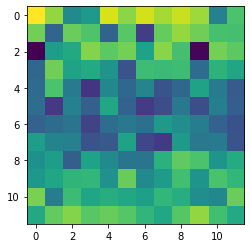

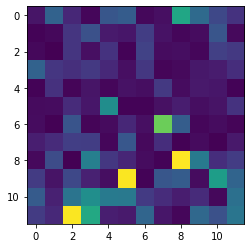

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
#                   'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=True,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)


## unfreeze, without pooler, limit 30000

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


  0%|          | 0/4690 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

  0%|          | 0/938 [00:00<?, ?it/s]

,i_epoch,train_loss,train_loss_SARC,train_acc,train_acc_SARC,val_loss,val_loss_SARC,val_acc,val_acc_SARC
0,0.0,0.478138,0.478138,0.770900,0.770900,0.589538,0.589538,0.689000,0.689000
1,1.0,0.246244,0.246244,0.900933,0.900933,0.874118,0.874118,0.681133,0.681133
2,2.0,0.107084,0.107084,0.961100,0.961100,0.971506,0.971506,0.672500,0.672500
3,3.0,0.042660,0.042660,0.985967,0.985967,1.194288,1.194288,0.679800,0.679800
4,4.0,0.015262,0.015262,0.995000,0.995000,1.463859,1.463859,0.680900,0.680900


Iteration:   0%|          | 0/938 [00:00<?, ?it/s]

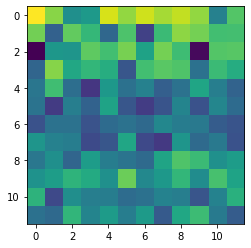

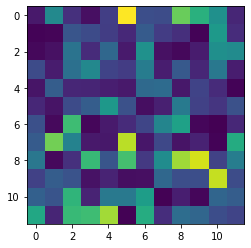

In [ ]:
selected_tasks = [
#                   'PASTEL_country', # 33224
                  'SARC', # 205645
#                   'SarcasmGhosh', # 39780
#                   'ShortHumor', # 37801
#                   'ShortJokeKaggle', # 406682
#                   'ShortRomance', # 1902
#                   'TroFi', # 3335
#                   'VUA', # 15157
                 ] 
training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

model = init_model(training_args)
freeze_model(model, training_args.freeze_bert)
df_evaluation, df_loss_per_step, model = train_model(model, training_args)

eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')
attn_entropy, head_importance, preds, labels = compute_heads_importance(model, eval_dataloader, training_args)

imshow(attn_entropy)
imshow(head_importance)
